# Capstone Project - The Battle of Neighborhoods : The Districts and Neighbourhoods of Seattle

# Introduction and Business Problem

#### The city of Seattle also known as The Emerald city is the largest city in the state of Washington and is the inspiration behind Grey's Anatomy's hospital, Seattle Grace / Greys Sloan Memorial Hospital which is set in the city. Seattle, with a Mediterranean climate is home to the headquarters of the two tech giants, Microsoft and Amazon. The city has a rich culture and up to this day still maintain's its status as a regional centre of the performing arts.

#### Our project is defined by the following problem. A very famous and fast growing vegan cakes and ice cream restaurant franchise wants to open its doors in the city of Seattle after establishing itself in Europe and some of the vibrant cities in the United States of America. The restaurant is to be opened in a "popular" district with a lot of neighbourhoods that are already well established with lots of restaurants, pubs, movie theaters and etc. The proposed district should be the most popular in the whole city with more than five neighbourhoods. The franchise is hoping to be provided with a list of these neighbourhoods so that they can make their final decision based on site visits to the various neighbourhoods in one of the districts of Seattle.

## Data Section

#### We plan to scrape data from the internet (Wikipedia) that includes both the neighbourhoods and their corresponding districts. The raw data might be a bit hard to work with and so we will probably have to clean it and find and replace missing data. Wikipedia will be our primary source of data for our districts and neighbourhoods and we intend to use the Foursquare API to supplement our data and to find the specified venues in the business problem. We will be using Geopy for our location data (latitude/longitude) for the different neighbourhoods and to map our city and neighbourhoods

In [1]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    numpy-1.18.1               |   py36h95a1406_0         5.2 MB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    sci

In [4]:
page = 'https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Seattle'
scrape = pd.read_html(page, attrs= {"class":"wikitable"})
scrape[0].head()

ImportError: lxml not found, please install it

In [7]:
#Install Required Packages
!pip install beautifulsoup4
!easy_install lxml
!pip install geocoder
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes
!pip install yellowbrick
print('Installation successful')


     |████████████████████████████████| 112kB 26.2MB/s eta 0:00:01
Searching for lxml
Reading https://pypi.org/simple/lxml/
Best match: lxml 4.5.0
Processing lxml-4.5.0-cp36-cp36m-manylinux1_x86_64.whl
Installing lxml-4.5.0-cp36-cp36m-manylinux1_x86_64.whl to /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages
writing requirements to /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/lxml-4.5.0-py3.6-linux-x86_64.egg/EGG-INFO/requires.txt
Adding lxml 4.5.0 to easy-install.pth file

Installed /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/lxml-4.5.0-py3.6-linux-x86_64.egg
Processing dependencies for lxml
Finished processing dependencies for lxml
     |████████████████████████████████| 102kB 6.4MB/s ta 0:00:011
     |████████████████████████████████| 829kB 12.6MB/s eta 0:00:01
     |████████████████████████████████| 81kB 16.5MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2f

In [8]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 
from geopy.geocoders import Nominatim
import geocoder 
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium # map rendering library
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

print('Libraries imported successfully.')

Libraries imported successfully.


In [9]:

url = 'https://en.wikipedia.org/wiki/New_towns_of_Singapore'
extraction = requests.get(url).text
wiki_data = BeautifulSoup(extraction, features='html')

In [10]:
column_names = ['Name', 'Chinese', 'Pinyin', 'Tamil', 'Total Area', 'Residential Area', 'Units', 'Ultimate', 'Population']
df_SG_original = pd.DataFrame(columns = column_names)

content = wiki_data.find('div', class_='mw-parser-output')
table = content.table.tbody
name = 0
chinese = 0
pinyin = 0
tamil = 0
total_area = 0
residential_area = 0
units = 0
ultimate = 0
population = 0

for tr in table.find_all('tr'):
    i = 0
    for td in tr.find_all('td'):
        if i == 0:
            name = td.text.strip('\n')
            i = i + 1
        elif i == 1:
            chinese = td.text.strip('\n')
            i = i + 1
        elif i == 2:
            pinyin = td.text.strip('\n')
            i = i + 1
        elif i == 3:
            tamil = td.text.strip('\n')
            i = i + 1
        elif i == 4:
            total_area = td.text.strip('\n')
            i = i + 1
        elif i == 5:
            residential_area = td.text.strip('\n')
            i = i + 1
        elif i == 6:
            units = td.text.strip('\n')
            i = i + 1 
        elif i == 7:
            ultimate = td.text.strip('\n')
            i = i + 1
        elif i == 8:
            population = td.text.strip('\n')
    df_SG_original = df_SG_original.append({'Name': name,'Chinese': chinese, 'Pinyin': pinyin, 'Tamil':tamil, \
    'Total Area': total_area,'Residential Area': residential_area, 'Units': units, 'Ultimate': ultimate, \
    'Population': population},ignore_index=True)

#Copy the data from original df_SG
df_SG = df_SG_original.copy()

#Cleaning Service that removes unnecessary row and columns
df_SG.drop(df_SG.index[0], inplace=True)
df_SG.drop({'Chinese', 'Pinyin', 'Tamil', 'Units', 'Ultimate'}, axis=1,inplace = True)
df_SG.reset_index(inplace=True, drop=True)

# Coordinate Data Collection Section

In [11]:
def get_latlng(Name):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, KSingapore'.format(Name))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [12]:
#Obtaining coordinate data
coordinates = [get_latlng(Name) for Name in df_SG['Name'].tolist()]
df_coordinates = pd.DataFrame(coordinates, columns=['Latitude', 'Longitude'])

In [13]:
df_SG['Latitude'] = df_coordinates['Latitude']
df_SG['Longitude'] = df_coordinates['Longitude']
df_SG.head()

,Name,Total Area,Residential Area,Population,Latitude,Longitude
0,Ang Mo Kio,6.38,2.83,"149,800",1.37161,103.84546
1,Bedok,9.37,4.18,"204,300",1.32425,103.95297
2,Bishan,6.90,1.72,"65,700",1.35079,103.85110
3,Bukit Batok,7.85,2.91,"113,800",1.34952,103.75277
4,Bukit Merah,8.58,3.12,"147,000",1.28322,103.81676


In [14]:
df_SG.to_csv('df_SG.csv', index=False)

In [15]:

df_SG2 = pd.read_csv('df_SG.csv')
df_SG3 = pd.read_csv('df_SG.csv')
df_SG2.rename(columns={'Residential Area' : 'Residential_Area'}, inplace=True)
df_SG2['Population'] = df_SG2['Population'].apply(lambda x: x.replace(',','.'))
df_SG2 = df_SG2.iloc[:, 1:].astype(float)
df_SG2['Population Density'] = df_SG2.Population / df_SG2.Residential_Area
df_SG2['Name'] = df_SG3['Name']
fixed_columns = [df_SG2.columns[-1]] + list(df_SG2.columns[:-1])
df_SG2 = df_SG2[fixed_columns]
df_SG2.head()

,Name,Total Area,Residential_Area,Population,Latitude,Longitude,Population Density
0,Ang Mo Kio,6.38,2.83,149.8,1.37161,103.84546,52.932862
1,Bedok,9.37,4.18,204.3,1.32425,103.95297,48.875598
2,Bishan,6.90,1.72,65.7,1.35079,103.85110,38.197674
3,Bukit Batok,7.85,2.91,113.8,1.34952,103.75277,39.106529
4,Bukit Merah,8.58,3.12,147.0,1.28322,103.81676,47.115385


# Folium Section : MAPS

In [16]:
df_SG4 = df_SG2
country = 'Singapore'

geolocator = Nominatim(user_agent='HeySingapore')
location = geolocator.geocode(country)
latitude = location.latitude
longitude = location.longitude
print('The coordinates of Singapore are {}, {}.'.format(latitude, longitude))

The coordinates of Singapore are 1.357107, 103.8194992.


In [17]:
map_SG = folium.Map(location=[latitude, longitude], zoom_start=11)

#Add markers to Singapore map
for lat, lng, name in zip(df_SG4['Latitude'], df_SG4['Longitude'], df_SG4['Name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_SG)  
map_SG

In [18]:
map_SG.save('map_SG.html')

#  Foursquare Section

In [19]:

#Initialising Foursquare Credentials
CLIENT_ID = 'LE3EDX02I5LDJAKS5UI4SR1IT5CO1MKLAX3TTCI53VSYGEMY'
CLIENT_SECRET = 'PCM4W5RJF0H4FXFM4LGUUVGROTVUDDGM3SAI4MI3ALRLELEB'
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
limit = 60

Your credentials:
CLIENT_ID: LE3EDX02I5LDJAKS5UI4SR1IT5CO1MKLAX3TTCI53VSYGEMY
CLIENT_SECRET:PCM4W5RJF0H4FXFM4LGUUVGROTVUDDGM3SAI4MI3ALRLELEB


In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&categoryId=58daa1558bbb0b01f18ec1f7&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()['response']['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],
            v['categories'][0]['name']) for v in results])
            
     
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Name', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
SG_venues3 = getNearbyVenues(names=df_SG4['Name'],
                                   latitudes=df_SG4['Latitude'],
                                   longitudes=df_SG4['Longitude']
                                  )

In [22]:

#Create a DataFrame to count hospital wards
venues_df = pd.DataFrame(SG_venues3)

# Define column names
venues_df.columns = ['Name', 'Latitude', 'Longitude', 'Venue_Name', 'Venue_Latitude', 'Venue_Longitude', 'Venue_Category']

print(venues_df.shape)

#Save SG_Venues to CSV file
SG_venues3.to_csv('SG_venues3.csv')

(161, 7)


In [23]:

#Merging our hospital ward count dataframe with previous df_SG2 dataframe that contains population density
#The new df_merged database will be used for clustering the neighborhoods
#Note that Name columns means Town Name
#For towns that do not have hospital ward, ward count is assigned zero (0) with fillna function 
df_to_merge = pd.DataFrame(venues_df.groupby(['Name']).count().iloc[:,2]).reset_index()
df_to_merge.rename(columns={'Venue_Name':'Ward Count'}, inplace=True)
df_merged = df_SG2.merge(df_to_merge, on='Name', how='left').fillna(0)
df_merged.to_csv('df_merged.csv', index = False)

# Clustering Section

In [25]:
df_cluster = pd.read_csv('df_merged.csv')
df_cluster.drop({'Total Area', 'Residential_Area', 'Population', 'Latitude', 'Longitude'}, axis=1,inplace = True)
df_cluster.head()

,Name,Population Density,Ward Count
0,Ang Mo Kio,52.932862,0.0
1,Bedok,48.875598,8.0
2,Bishan,38.197674,6.0
3,Bukit Batok,39.106529,8.0
4,Bukit Merah,47.115385,26.0


In [26]:

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cluster.iloc[:,1:]))
df_scaled.rename(columns={0:'S_Population_Density', 1:'S_Ward_Count'}, inplace=True)
df_scaled['Name'] = df_cluster['Name']
fixed_columns4 = [df_scaled.columns[-1]] + list(df_scaled.columns[:-1])
df_scaled = df_scaled[fixed_columns4]
df_scaled.head()

,Name,S_Population_Density,S_Ward_Count
0,Ang Mo Kio,0.953049,0.000000
1,Bedok,0.829516,0.163265
2,Bishan,0.504400,0.122449
3,Bukit Batok,0.532073,0.163265
4,Bukit Merah,0.775922,0.530612


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


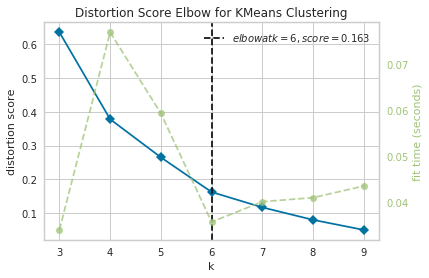

In [27]:
df_SG5 = df_SG2.copy()
df_clustered = df_scaled.drop('Name', 1)

# Instantiate the clustering model and visualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(3,10))
visualizer.fit(df_clustered)       
visualizer.show()

In [28]:
#Determine number of clusters
#According to yellowbrick visualiser, optimal cluster number = 6
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clustered)
#Add Cluster Labels back to dataframe
df_SG5.insert(7, 'Cluster Labels', kmeans.labels_)
df_SG5.dropna(inplace=True)
df_SG5 = df_SG5.merge(df_scaled, on = 'Name', how = 'left').fillna(0)
#df_SG5.drop({2}, axis=1, inplace=True)
df_SG5.head()

,Name,Total Area,Residential_Area,Population,Latitude,Longitude,Population Density,Cluster Labels,S_Population_Density,S_Ward_Count
0,Ang Mo Kio,6.38,2.83,149.8,1.37161,103.84546,52.932862,3,0.953049,0.000000
1,Bedok,9.37,4.18,204.3,1.32425,103.95297,48.875598,1,0.829516,0.163265
2,Bishan,6.90,1.72,65.7,1.35079,103.85110,38.197674,4,0.504400,0.122449
3,Bukit Batok,7.85,2.91,113.8,1.34952,103.75277,39.106529,4,0.532073,0.163265
4,Bukit Merah,8.58,3.12,147.0,1.28322,103.81676,47.115385,5,0.775922,0.530612


In [29]:
pd.DataFrame(df_SG5.groupby(['Cluster Labels', 'Name']).count().iloc[:,0])

Total Area
Cluster Labels Name                       
0              Toa Payoh                 1
1              Bedok                     1
               Geylang                   1
               Hougang                   1
               Jurong East               1
               Sengkang                  1
               Serangoon                 1
               Tampines                  1
               Yishun                    1
2              Punggol                   1
               Sembawang                 1
3              Ang Mo Kio                1
               Bukit Panjang             1
               Choa Chu Kang             1
               Jurong West               1
               Woodlands                 1
4              Bishan                    1
               Bukit Batok               1
               Clementi                  1
               Pasir Ris                 1
               Queenstown                1
5              Bukit Merah               1
               Kallang/Whampoa           1

In [30]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, tiles='Stamen Terrain')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_SG5['Latitude'], df_SG5['Longitude'], df_SG5['Name'], df_SG5['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        na=True,
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

# Summarising the mean results of each cluster

In [31]:
df_SG7 = df_SG5.groupby('Cluster Labels').mean()
df_SG8 = df_SG7.iloc[:, [6,7]]#.sort_values("S_Population_Density", ascending=False)
df_SG8

,S_Population_Density,S_Ward_Count
Cluster Labels,,
0,0.661177,1.000000
1,0.755956,0.058673
2,0.075705,0.030612
3,0.953241,0.000000
4,0.480231,0.093878
5,0.823461,0.642857


# Data Analysis

# It can be inferred from the table above that:
### Cluster 0: medium-high population density, highest hospital ward count
### Cluster 1: high population density, very low hospital ward count
### Cluster 2: lowest population density, very low hospital ward count
### Cluster 3: highest population density, no hospital ward count
### Cluster 4: medium population density, low hospital ward count
### Cluster 5: high population density, moderate ward count

# Therefore, we can summarise the results as priorities to develop each cluster as follows:
### High priority clusters: 3, 1
### Medium priority clusters: 4
### Low priority clusters: 5, 2
### Zero priority clusters: 0

# High Priority Clusters 3 and 1
### Towns
### --- 3: Ang Mo Kio, Bukit Panjang, Choa Chu Kang, Jurong West, Woodlands
### --- 1: Bedok, Geylang, Hougang, Jurong East, Sengkang, Serangoon, Tampines, Yishun

# Medium Priority Cluster 4
## Towns
### --- 4: Bishan, Bukit Batok, Clementi, Pasir Ris, Queenstown

# Low Priority Clusters 5 and 2
## Towns
### --- 5: Bukit Merah, Kallang/Whampoa
### --- 2: Punggol, Sembawang

# Zero Priority Cluster 0
## Towns
### --- 0: Toa Payoh

# Cluster 0

In [32]:

df_SG6 = df_SG5[df_SG5['Cluster Labels'] == 0]
df_SG6.iloc[:, [0,8,9]]

,Name,S_Population_Density,S_Ward_Count
20,Toa Payoh,0.661177,1.0


# Cluster 1

In [34]:
df_SG6 = df_SG5[df_SG5['Cluster Labels'] == 1]
df_SG6.iloc[:, [0,8,9]]

,Name,S_Population_Density,S_Ward_Count
1,Bedok,0.829516,0.163265
8,Geylang,0.648912,0.000000
9,Hougang,0.833055,0.000000
10,Jurong East,0.823154,0.163265
17,Sengkang,0.771718,0.061224
18,Serangoon,0.704976,0.000000
19,Tampines,0.667423,0.020408
22,Yishun,0.768890,0.061224


# Cluster 2

In [35]:
df_SG6 = df_SG5[df_SG5['Cluster Labels'] == 2]
df_SG6.iloc[:, [0,8,9]]

,Name,S_Population_Density,S_Ward_Count
14,Punggol,0.151411,0.061224
16,Sembawang,0.000000,0.000000


# Cluster 3

In [36]:
df_SG6.iloc[:, [0,8,9]]

,Name,S_Population_Density,S_Ward_Count
14,Punggol,0.151411,0.061224
16,Sembawang,0.000000,0.000000


# Cluster 4

In [38]:
df_SG6 = df_SG5[df_SG5['Cluster Labels'] == 4]
df_SG6.iloc[:, [0,8,9]]

,Name,S_Population_Density,S_Ward_Count
2,Bishan,0.504400,0.122449
3,Bukit Batok,0.532073,0.163265
7,Clementi,0.428787,0.000000
13,Pasir Ris,0.404167,0.020408
15,Queenstown,0.531729,0.163265


# cluster5

In [39]:

df_SG6 = df_SG5[df_SG5['Cluster Labels'] == 5]
df_SG6.iloc[:, [0,8,9]]

,Name,S_Population_Density,S_Ward_Count
4,Bukit Merah,0.775922,0.530612
12,Kallang/Whampoa,0.871001,0.755102


# Further Investigation on Individual Towns
##### By investigating further on high priority clusters: cluster 3 and cluster 1
##### It is found that certain towns provides even more surprising new facts.
##### Those facts are reported as follows:
##### 
#####  Bukit Panjang has the highest population density across Singapore but no hospital wards.
##### Jurong West has the highest population density after Bukit Panjang in cluster 3 but no hospital wards.
##### All cluster 3 towns outclasses those of cluster 1 because all cluster 3 towns have higher density and no hospital ward count.
##### Hougang, Bedok, and Jurong East have the best potential from cluster 1 towns: the highest population density in cluster 1 but no hospital wards.
##### In order to provide preventive advices, we may also look on other lower priority clusters.
##### Another new facts are also reported below:

##### Toa Payoh has the highest hospital ward count across Singapore. Thus, the reader is advised to set it aside.
##### Sembawang has the lowest population density across Singapore, even though it has no hospital wards nearby. Thus, the reader is advised to set it aside.
##### Furthermore, another interesting fact is found:

##### Clementi and Pasir Ris has moderate population density but zero and very low hospital ward respectively .
##### These two towns may be prioritised after considering the high priority areas from cluster 3 and 1 first.